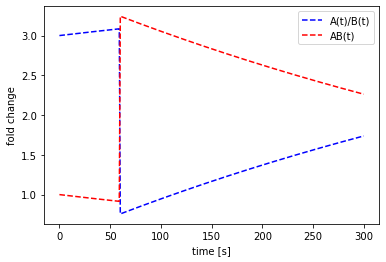

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# initialize kinetic parameters
koff = 0.0015
kon = 1

# function that returns dz/dt, a collection of 3 different ddRFP concentrations
def model(z,t,I):
    A = z[0]
    B = z[1]
    AB = z[2]
    dAdt = koff*AB - I*kon*A*B
    dBdt = koff*AB - I*kon*A*B
    dABdt = I*kon*A*B - koff*AB
    dzdt = [dAdt,dBdt,dABdt]
    return dzdt

# initial condition
z0 = [3,3,1]

# number of time points (301 for 300s, interval t = 1s)
n = 301

# time points
t = np.linspace(0,300,n)

# step-wise function input
I = np.zeros(n)
# change to 1 at time = 60s - 61s
I[60:61] = 1

# store solution
A = np.empty_like(t)
B = np.empty_like(t)
AB = np.empty_like(t)

# record initial conditions
A[0] = z0[0]
B[0] = z0[1]
AB[0] = z0[2]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(I[i],))
    # store solution for plotting
    A[i] = z[1][0]
    B[i] = z[1][1]
    AB[i] = z[1][2]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,A,'b--',label='A(t)/B(t)')
plt.plot(t,AB,'r--',label='AB(t)')
plt.ylabel('fold change')
plt.xlabel('time [s]')
plt.legend(loc='best')
plt.show()